# Keras ResNet classifier for CIFAR10 test
ResNet network for CIFAR10 network test

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from data_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import tensorflow as tf 
from keras import backend as k
import os
config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.1
config.gpu_options.allow_growth = True
k.tensorflow_backend.set_session(tf.Session(config=config))

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
# get data
cifar10_data = CIFAR10Data()
x_train, y_train, x_test, y_test = cifar10_data.get_data(subtract_mean=True)

num_train = int(x_train.shape[0] * 0.8)
num_val = x_train.shape[0] - num_train
mask = list(range(num_train, num_train+num_val))
x_val = x_train[mask]
y_val = y_train[mask]

mask = list(range(num_train))
x_train = x_train[mask]
y_train = y_train[mask]

data = (x_train, y_train, x_val, y_val, x_test, y_test)

CIFAR10 Training data shape: (50000, 32, 32, 3)
CIFAR10 Training label shape (50000, 1)
CIFAR10 Test data shape (10000, 32, 32, 3)
CIFAR10 Test label shape (10000, 1)


## Test with ResNet18
the resnet18 is modified with the standard resnet18 architecture.

In [3]:
from classifiers.ResNet import ResNet18
from keras import losses
from keras import optimizers

weight_decay = 5e-4
lr = 1e-2
num_classes = 10
resnet18 = ResNet18(input_shape=(32, 32, 3), classes=num_classes, weight_decay=weight_decay)
opt = optimizers.SGD(lr=lr, momentum=0.9, decay=1e-6, nesterov=False)
resnet18.compile(optimizer=opt,
                 loss=losses.categorical_crossentropy,
                 metrics=['accuracy'])
resnet18.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   1728        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 64)   192         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 64)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [4]:
%%time
from cifar10_solver import *
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch):
    new_lr = lr * (0.5 ** (epoch // 30))
    print('new lr:%.2e' % new_lr)
    return new_lr 

reduce_lr = LearningRateScheduler(lr_scheduler)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
#                               patience=10, min_lr=1e-6, verbose=1)

solver = CIFAR10Solver(resnet18, data)
history = solver.train(epochs=200, batch_size=128, data_augmentation=True, callbacks=[reduce_lr])

train with data augmentation
Epoch 1/200
new lr:1.00e-02
313/313 [==============================] - 32s 101ms/step - loss: 3.2831 - acc: 0.4413 - val_loss: 3.2204 - val_acc: 0.4553
Epoch 2/200
new lr:1.00e-02
313/313 [==============================] - 26s 82ms/step - loss: 2.7756 - acc: 0.6004 - val_loss: 2.7728 - val_acc: 0.5880
Epoch 3/200
new lr:1.00e-02
313/313 [==============================] - 25s 81ms/step - loss: 2.4689 - acc: 0.6841 - val_loss: 2.8815 - val_acc: 0.5815
Epoch 4/200
new lr:1.00e-02
313/313 [==============================] - 25s 81ms/step - loss: 2.2550 - acc: 0.7325 - val_loss: 2.2771 - val_acc: 0.7220
Epoch 5/200
new lr:1.00e-02
313/313 [==============================] - 25s 80ms/step - loss: 2.0909 - acc: 0.7657 - val_loss: 2.1872 - val_acc: 0.7286
Epoch 6/200
new lr:1.00e-02
313/313 [==============================] - 25s 81ms/step - loss: 1.9513 - acc: 0.7891 - val_loss: 2.4599 - val_acc: 0.6801
Epoch 7/200
new lr:1.00e-02
313/313 [===========================

Epoch 55/200
new lr:5.00e-03
313/313 [==============================] - 29s 93ms/step - loss: 0.3954 - acc: 0.9700 - val_loss: 0.8172 - val_acc: 0.8772
Epoch 56/200
new lr:5.00e-03
313/313 [==============================] - 29s 93ms/step - loss: 0.3912 - acc: 0.9688 - val_loss: 0.7739 - val_acc: 0.8785
Epoch 57/200
new lr:5.00e-03
313/313 [==============================] - 29s 93ms/step - loss: 0.3912 - acc: 0.9689 - val_loss: 0.7726 - val_acc: 0.8872
Epoch 58/200
new lr:5.00e-03
313/313 [==============================] - 30s 96ms/step - loss: 0.3841 - acc: 0.9699 - val_loss: 0.7521 - val_acc: 0.8868
Epoch 59/200
new lr:5.00e-03
313/313 [==============================] - 31s 98ms/step - loss: 0.3797 - acc: 0.9688 - val_loss: 0.8492 - val_acc: 0.8709
Epoch 60/200
new lr:5.00e-03
313/313 [==============================] - 29s 93ms/step - loss: 0.3774 - acc: 0.9692 - val_loss: 0.8141 - val_acc: 0.8731
Epoch 61/200
new lr:2.50e-03
313/313 [==============================] - 29s 92ms/step - 

Epoch 109/200
new lr:1.25e-03
313/313 [==============================] - 26s 82ms/step - loss: 0.1853 - acc: 0.9979 - val_loss: 0.5674 - val_acc: 0.9202
Epoch 110/200
new lr:1.25e-03
313/313 [==============================] - 25s 81ms/step - loss: 0.1826 - acc: 0.9985 - val_loss: 0.5350 - val_acc: 0.9246
Epoch 111/200
new lr:1.25e-03
313/313 [==============================] - 24s 77ms/step - loss: 0.1808 - acc: 0.9988 - val_loss: 0.5392 - val_acc: 0.9251
Epoch 112/200
new lr:1.25e-03
313/313 [==============================] - 27s 85ms/step - loss: 0.1806 - acc: 0.9983 - val_loss: 0.5552 - val_acc: 0.9211
Epoch 113/200
new lr:1.25e-03
313/313 [==============================] - 26s 84ms/step - loss: 0.1800 - acc: 0.9982 - val_loss: 0.5734 - val_acc: 0.9203
Epoch 114/200
new lr:1.25e-03
313/313 [==============================] - 26s 82ms/step - loss: 0.1774 - acc: 0.9986 - val_loss: 0.5294 - val_acc: 0.9270
Epoch 115/200
new lr:1.25e-03
313/313 [==============================] - 26s 83ms/

313/313 [==============================] - 30s 95ms/step - loss: 0.1454 - acc: 0.9998 - val_loss: 0.4840 - val_acc: 0.9328
Epoch 163/200
new lr:3.13e-04
313/313 [==============================] - 29s 94ms/step - loss: 0.1452 - acc: 0.9999 - val_loss: 0.4807 - val_acc: 0.9332
Epoch 164/200
new lr:3.13e-04
313/313 [==============================] - 29s 94ms/step - loss: 0.1450 - acc: 0.9998 - val_loss: 0.4846 - val_acc: 0.9338
Epoch 165/200
new lr:3.13e-04
313/313 [==============================] - 29s 92ms/step - loss: 0.1451 - acc: 0.9997 - val_loss: 0.4856 - val_acc: 0.9327
Epoch 166/200
new lr:3.13e-04
313/313 [==============================] - 29s 94ms/step - loss: 0.1445 - acc: 0.9998 - val_loss: 0.4869 - val_acc: 0.9330
Epoch 167/200
new lr:3.13e-04
313/313 [==============================] - 27s 87ms/step - loss: 0.1440 - acc: 0.9999 - val_loss: 0.4846 - val_acc: 0.9335
Epoch 168/200
new lr:3.13e-04
313/313 [==============================] - 26s 82ms/step - loss: 0.1437 - acc: 0.9

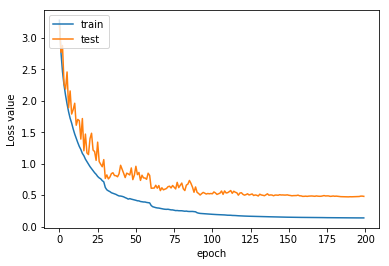

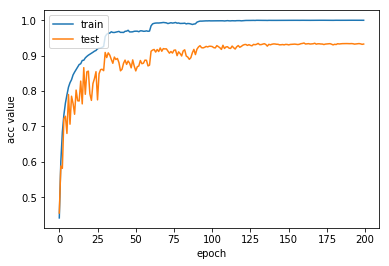

In [5]:
# plot loss and acc 
plot_history(history)

In [6]:
solver.test()

10000/10000 [==============================] - 4s 382us/step
test data loss:0.51 acc:0.93
